### Boston 주택 가격 예측(Linear Regression, scikit-learn 사용) :선형회귀모델

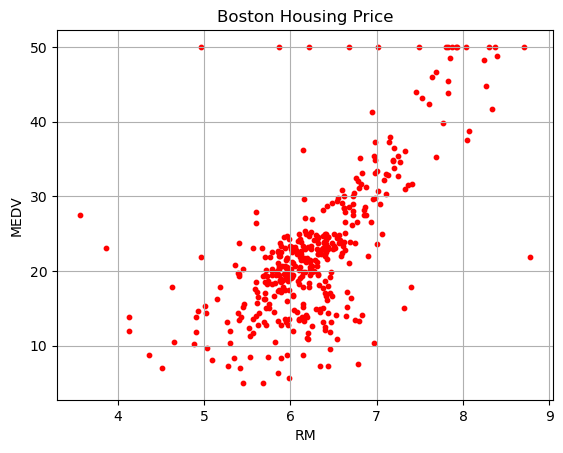

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA : 탐색적 데이터 분석
df = pd.read_csv('boston_train.csv')

# 상관계수
df.corr()
# 'RM' : 방의 갯수 , 0.685041

# 시각화
plt.scatter(df['RM'],df['MEDV'],c='r',s=10)
plt.xlabel('RM')    # x축: RM(방의 갯수)
plt.ylabel('MEDV')  # y축: MEDV(주택가격)
plt.title('Boston Housing Price')
plt.grid()
plt.show()
df

(400, 1) (400, 1)
[[9.02315014]]
[-33.99803804]


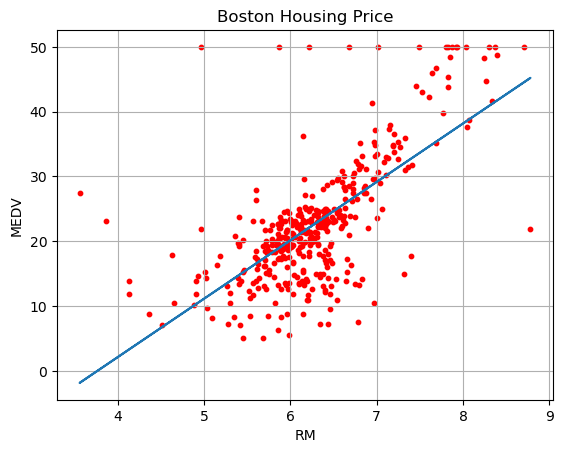

In [2]:
# 단항(1차원, 피처가 1개) 회귀 모델, scikit-learn 사용
from sklearn.linear_model import LinearRegression

# 클래스의 인스턴스를 생성
lr = LinearRegression()

# 입출력 데이터를 설정 : 2차원 배열
x = df['RM'].values.reshape(-1,1)   # (400,) --> (400,1),2차원, -1은 자동 계산
y = df['MEDV'].values.reshape(-1,1) # (400,) --> (400,1),2차원, -1은 자동 계산
print(x.shape,y.shape)

# 학습
lr.fit(x,y)

# 회귀계수를 출력
print(lr.coef_)         # weight : [[9.02315014]]
print(lr.intercept_)    # bias : [-33.99803804]
                        # H(X) = 9.02315014*X - 33.99803804
    
# 예측
y_pred = lr.predict(x)

# 결과 시각화
plt.scatter(x,y,c='r',s=10)
plt.xlabel('RM')    # x축: RM(방의 갯수)
plt.ylabel('MEDV')  # y축: MEDV(주택가격)
plt.title('Boston Housing Price')
plt.grid()

# 예측 함수(직선그래프) : H(x) = 9.02315014*x - 33.99803804
plt.plot(x,y_pred)
plt.show()

In [3]:
# 정확도 측정, 평가 지표
# RMSE , 상대 지표(값이 작을 수록 정확도가 높다)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_pred)  # 평균 제곱 오차
rmse = np.sqrt(mse)                 # 평균 제곱근 오차
print('RMSE:',rmse)                 # RMSE: 6.964958263761021

# R2(R-squared),결정 계수 : 예측 값의 분산/실제 값의 분산 , 1일때 가장 설명력이 높다
#                          절대 지표
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print('r2_score:',r2)      # 0.46928062004385107

RMSE: 6.964958263761021
r2_score: 0.46928062004385107


[[-1.59072134e-01  4.08534780e-02 -1.18682966e-01 -2.14042031e+01
   6.06293561e+00 -4.40157092e-02 -1.81025024e+00  4.29464930e-04
  -1.08359905e+00]]
[27.68496713]


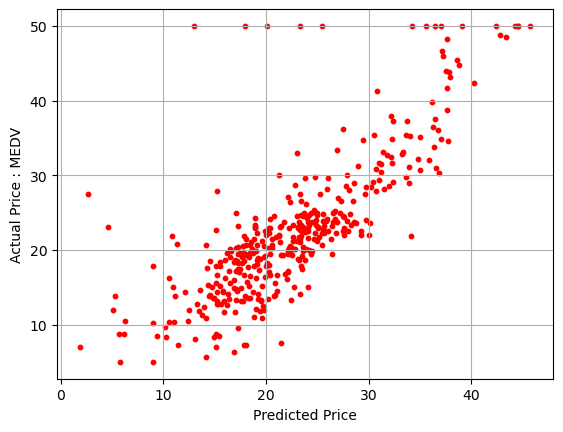

In [17]:
# 다항(다차원, 피처가 2개 이상) 회귀 모델, scikit-learn 사용
x = df.iloc[:,:-1]   # 마지막 컬럼을 제외, 9개 컬럼을 피쳐로 사용, (400,9),2차원
y = df.iloc[:,-1:]   # 마지막 컬럼만 추출, (400,1), 2차원

# 클래스의 인스턴스 생성
lr = LinearRegression()

# 학습
lr.fit(x,y)

# 회귀계수를 출력
print(lr.coef_)          # weight 은 9개가 생성
print(lr.intercept_)     # bias는 1개 생성
    # H(X1,X2,X3,...,X9) = w1*X1 + W2*X2 + W3*X3,...,W9*X9 + b

# 예측
y_pred = lr.predict(x)
y_pred.shape     # (400, 1)

# 결과 시각화 :  x축을 예측값, y축을 실제값
plt.scatter(y_pred, y, c='r',s=10)
plt.xlabel('Predicted Price') 
plt.ylabel('Actual Price : MEDV')  
plt.grid()
plt.show()

In [21]:
# 정확도 측정, 평가 지표
# RMSE , 상대 지표(값이 작을 수록 정확도가 높다)
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('RMSE:',rmse)  # 6.964958263761021 -->  5.753475905312981
                     # 단항회귀보다 RMSE가 감소, 성능 향상
    
# R2(R-squared),결정 계수 : 예측 값의 분산/실제 값의 분산 , 1일때 가장 설명력이 높다
#                          절대 지표
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print('r2_score:',r2)      # 0.46928062004385107  --> 0.6378499850549992
                           # 단항회귀모바 증가, 성능 향상
    
# 결과 : 단항회귀 모델 보다 다항회귀 모델의 성능이 우수하다    

RMSE: 5.753475905312981
r2_score: 0.6378499850549991


In [22]:
# 상관계수 : 변수간의 상관관계를 나타내는 수치,  -1에서 1 사이에 있다
df.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
CRIM,1.000000,-0.197764,0.383433,0.407698,-0.219043,0.350003,-0.377643,0.563791,0.284306,-0.375836
ZN,-0.197764,1.000000,-0.532929,-0.521745,0.328418,-0.561062,0.665677,-0.323539,-0.393904,0.365931
INDUS,0.383433,-0.532929,1.000000,0.758157,-0.393738,0.644559,-0.717796,0.722435,0.386248,-0.465083
NOX,0.407698,-0.521745,0.758157,1.000000,-0.309519,0.735999,-0.776624,0.664923,0.185284,-0.410425
RM,-0.219043,0.328418,-0.393738,-0.309519,1.000000,-0.253271,0.211441,-0.302268,-0.395436,0.685041
AGE,0.350003,-0.561062,0.644559,0.735999,-0.253271,1.000000,-0.742486,0.521723,0.260205,-0.368922
DIS,-0.377643,0.665677,-0.717796,-0.776624,0.211441,-0.742486,1.000000,-0.555040,-0.227288,0.236714
TAX,0.563791,-0.323539,0.722435,0.664923,-0.302268,0.521723,-0.555040,1.000000,0.473023,-0.449570
PTRATIO,0.284306,-0.393904,0.386248,0.185284,-0.395436,0.260205,-0.227288,0.473023,1.000000,-0.531764
MEDV,-0.375836,0.365931,-0.465083,-0.410425,0.685041,-0.368922,0.236714,-0.449570,-0.531764,1.000000


In [23]:
new_df = df.loc[:,['CRIM','RM','TAX']]
new_df  # X값으로 사용

,CRIM,RM,TAX
0,2.30040,6.319,403
1,13.35980,5.887,666
2,0.12744,6.770,233
3,0.15876,5.961,305
4,0.03768,7.274,329
...,...,...,...
395,0.23912,6.019,391
396,0.04560,5.888,276
397,1.38799,5.950,307
398,7.36711,6.193,666


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=0)

# 다항 회귀
x = df.iloc[:,:-1]  
y = df.iloc[:,-1]  

# 학습
rf.fit(x,y)

# 예측
y_pred = rf.predict(x)

# 정확도 측정, 평가 지표
mse = mean_squared_error(y,y_pred)  # 평균 제곱 오차
rmse = np.sqrt(mse)                 # 평균 제곱근 오차
print('RMSE:',rmse)                 # RMSE: 1.7417950534219007

# R2(R-squared),결정 계수 : 예측 값의 분산/실제 값의 분산 , 1일때 가장 설명력이 높다
#                          절대 지표
r2 = r2_score(y,y_pred)
print('r2_score:',r2)      # r2_score: 0.9668088717202007

RMSE: 1.7417950534219007
r2_score: 0.9668088717202007


In [25]:
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0
